## 1.Import an XML file using python

1. 
"We have the following structure for books.xml and the code was designed to parse this particular XML file only"
<books>
<book>
        <author>Gambardella, Matthew</author>
        <title>XML Developer's Guide</title>
        <genre>Computer</genre>
        <price discount="0.15">44.95</price>
        <publish_date>2000-10-01</publish_date>
        <description>An in-depth look at creating applications with XML.</description>
</book>
</books>

In [52]:
import pandas as pd
import xml.etree.ElementTree as et

def parse_XML(xml_file, df_cols): 
    
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    *Args
    * xml_file" -> path of file
    *df_cols -> name of the node of the xml file
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
#   iterating through each node
    for node in xroot: 
        res = []
        for el in df_cols[0:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
#                 dictionary implementation as column name as key and text  as valus
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

# function
parse_XML("books.xml", ["author", "title", "genre", "price"])

,author,title,genre,price
0,"Gambardella, Matthew",XML Developer's Guide,Computer,44.95
1,"Corets, Eva",Maeve Ascendant,Fantasy,5.95
2,"Ralls, Kim",Midnight Rain,Fantasy,5.95
3,"Randall, Cynthia",Lover Birds,Romance,4.95
4,"Thurman, Paula",Splish Splash,Romance,4.95
5,"Knorr, Stefan",Creepy Crawlies,Horror,4.95
6,"Kress, Peter",Paradox Lost,Science Fiction,6.95
7,"O'Brien, Tim",Microsoft .NET: The Programming Bible,Computer,36.95
8,"Galos, Mike",Visual Studio 7: A Comprehensive Guide,Computer,49.95


## 3.Import the breast cancer dataset from sklearn library and attach the target variable data to the features data and store it in a JSON file


In [53]:
import sklearn.datasets
import pandas as pd
data = sklearn.datasets.load_breast_cancer()
# load Sklearm datasets to pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
# attach the target variable data to the features data
df['target'] =data.target
# store it in a JSON file
df.to_json('./breast_cancer.json', orient='index')

## 4. Make a regression dataset (500) with 7 features while having 4 informative features and store them on disk in a csv file


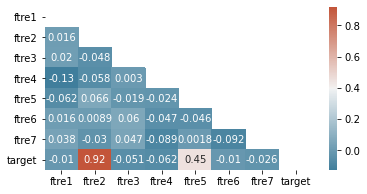

In [54]:
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
x,y = datasets.make_regression(n_samples=500,n_features=7, n_informative=2, random_state=42)
df = pd.DataFrame(x)
df.columns = ['ftre1','ftre2','ftre3','ftre4','ftre5','ftre6','ftre7']
df['target'] = y
corr =df.corr()
f,ax = plt.subplots(figsize=(6,3))
mask= np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr, annot=True, mask =mask,cmap=cmap)
# Storing Dataframe into CSV.
df.to_csv('./regression_dataset.csv')
